In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle
from sklearn.model_selection import train_test_split, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix, plot_confusion_matrix
#from sklearn.model_selection import KFold

In [2]:
# Data params
textures = 11
trials = 100

In [3]:
# Import dataset and labels from pickle
PATH = "/home/farscope2/Documents/PhD/Spiking Nets Project/SpikingNetsTexture/datasets/TacTip_NM/total_spikes/"
DATA_NAME = "Total spikes per texture dataset.pickle"
LABEL_NAME = str(textures) + " textures - " + str(trials) + " trials labels.pickle"
GRAPH_PATH = "/home/farscope2/Documents/PhD/Spiking Nets Project/SpikingNetsTexture/graphs/spike_classifier/"


# Import dataset first
FILENAME = PATH + DATA_NAME

# Create array of intensities for heatmap
with(open(FILENAME, "rb")) as openfile:
    try:
        dataset = pickle.load(openfile)
    except EOFError:
        print(EOFError)
        
# Now import label array
FILENAME = PATH + LABEL_NAME

# Create array of intensities for heatmap
with(open(FILENAME, "rb")) as openfile:
    try:
        labels = pickle.load(openfile)
    except EOFError:
        print(EOFError)

In [4]:
#print(len(dataset))

In [5]:
# WARNING: Dataset created from previous script contains a NULL row 0
#          This row has currently been deleted and saved over the initial dataset
#          Note for next time is to fix this bug
#print(dataset[0])
#dataset = np.delete(dataset, 0, 0)
#print(len(dataset))
if len(dataset) == 1101:
    dataset = np.delete(dataset, 0, 0)
    
# Split data into testing and training
# Ration currently 80-20
x_train, x_test, y_train, y_test = train_test_split(dataset, labels, test_size=0.2)

In [6]:
# # Create knn classifier w/5 neighbours and fit it to the training data
# # Play around with this value when determining accuracy
# knn = KNeighborsClassifier(n_neighbors=10)

# # Fit the model to the training data
# knn.fit(x_train, y_train)

In [7]:
# Create kfold validation model
kf = KFold(n_splits=10, random_state=63, shuffle=True)

In [8]:
# Use sklearn accuracy metrics to asses
# Test over a range of neighbour numbers
# TO DO: Use KFold cross validation for this method

max_n = 20

# accuracy_scores = []
# recall_scores = []
# precision_scores = []
train_accuracies = [[] for _ in range(max_n)]
val_accuracies = [[] for _ in range(max_n)]

x_train = np.array(x_train)
y_train = np.array(y_train)

# Total confusion arrays
Y_true = []
Y_Pred = []


for n in range(max_n):
    
    knn = KNeighborsClassifier(n_neighbors=n+1)
    
    # Loop through each of the folds within the kfold
    for train_index, val_index in kf.split(x_train):
        # Create folded data
        Xtrain, Xval = x_train[train_index], x_train[val_index]
        ytrain, yval = y_train[train_index], y_train[val_index]
        
        # Fit the model to the new folded training data
        knn.fit(Xtrain, ytrain)

        # Precit value using KNN
        #y_pred = knn.predict(x_test)
        pred_train = knn.predict(Xtrain)
        pred_val = knn.predict(Xval)
        
        # Append values to seperate array for confusion matrix
        Y_true.append(yval)
        Y_Pred.append(pred_val)

        #Calculate the accuracy of the predictions on the training set 
        #and save in the variable train_accuracies
        train_accuracies[n].append(accuracy_score(ytrain, pred_train))
        train_accuracies[n].append(recall_score(ytrain, pred_train, average='micro'))
        train_accuracies[n].append(precision_score(ytrain, pred_train, average='micro'))
        
        #Do the same for the predictions on the validation set
        ###TODO###
        val_accuracies[n].append(accuracy_score(yval, pred_val))
        val_accuracies[n].append(recall_score(yval, pred_val, average='micro'))
        val_accuracies[n].append(precision_score(yval, pred_val, average='micro'))

In [9]:
#Calculate the mean for training and validation accuracies
train_accuracy_mean = np.mean(train_accuracies, axis=1)
val_accuracy_mean = np.mean(val_accuracies, axis=1)

In [10]:
#print(np.mean(train_accuracy_mean))
print(np.mean(val_accuracy_mean))
print(np.max(val_accuracies))

0.46676136363636367
0.6136363636363636


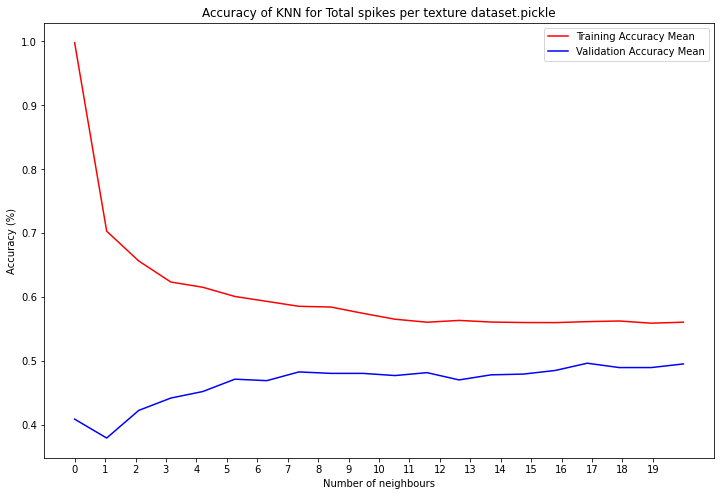

In [11]:
# Plot this data
x = np.linspace(0, max_n, 20)

fig, ax = plt.subplots(figsize=(12,8))

ax.plot(x, train_accuracy_mean, color='r',label='Training Accuracy Mean')
ax.plot(x, val_accuracy_mean, color='b',label='Validation Accuracy Mean')
plt.xlabel("Number of neighbours")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy of KNN for " + DATA_NAME)
plt.savefig(GRAPH_PATH + "KNN accuracy.png")
ax.legend()
plt.xticks(np.arange(0,20,1))
plt.show()

In [12]:
Y_true = [item for sublist in Y_true for item in sublist]
#print(Y_true)
Y_Pred = [item for sublist in Y_Pred for item in sublist]

In [13]:
cnf_matrix = confusion_matrix(Y_true, Y_Pred)

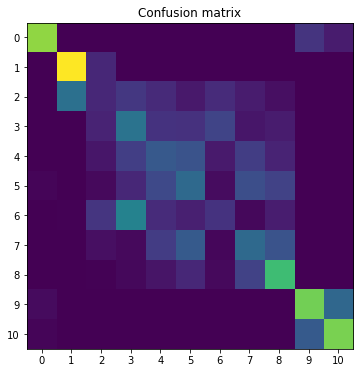

array([[1198,    0,    0,    0,    0,    0,    0,    0,    0,  215,  107],
       [   0, 1439,  161,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,  534,  163,  232,  170,   98,  175,  110,   58,    0,    0],
       [   0,    2,  144,  546,  212,  206,  295,   86,  109,    0,    0],
       [   0,    0,   89,  269,  404,  367,  105,  260,  146,    0,    0],
       [  20,    0,   39,  159,  319,  490,   45,  344,  284,    0,    0],
       [   0,    8,  220,  638,  177,  124,  209,   30,  114,    0,    0],
       [   0,    0,   60,   35,  254,  408,   23,  490,  370,    0,    0],
       [   0,    0,   11,   32,   84,  161,   38,  284,  990,    0,    0],
       [  42,    0,    0,    0,    0,    0,    0,    0,    0, 1135,  483],
       [  21,    0,    0,    0,    0,    0,    0,    0,    0,  408, 1151]])

In [14]:
plt.figure(figsize=(6, 6))
plt.xticks(range(11))
plt.yticks(range(11))
plt.imshow(cnf_matrix)
plt.title('Confusion matrix')
plt.savefig(GRAPH_PATH + DATA_NAME + " KNN confusion.png")
plt.show()
cnf_matrix

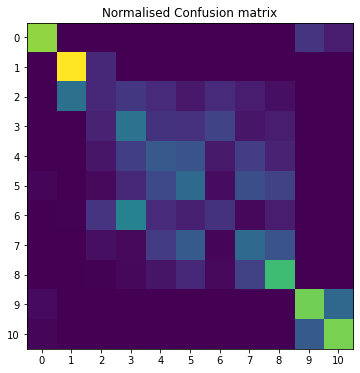

array([[0.36311637, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.06516696,
        0.03243193],
       [0.        , 0.43616399, 0.04879945, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.16185655, 0.04940565, 0.0703197 , 0.05152737,
        0.02970401, 0.05304288, 0.03334124, 0.01757992, 0.        ,
        0.        ],
       [0.        , 0.0006062 , 0.04364671, 0.16549377, 0.06425766,
        0.06243904, 0.08941513, 0.02606678, 0.03303813, 0.        ,
        0.        ],
       [0.        , 0.        , 0.02697609, 0.08153448, 0.12245327,
        0.11123849, 0.03182573, 0.07880656, 0.04425291, 0.        ,
        0.        ],
       [0.00606204, 0.        , 0.01182098, 0.04819324, 0.09668959,
        0.14852005, 0.0136396 , 0.10426714, 0.08608101, 0.        ,
        0.        ],
       [0.        , 0.00242482, 0.06668247, 0.19337917, 0.

In [15]:
norm = np.linalg.norm(cnf_matrix)
normal_cnf = cnf_matrix/norm

plt.figure(figsize=(6, 6))
plt.xticks(range(11))
plt.yticks(range(11))
plt.imshow(normal_cnf)
plt.title('Normalised Confusion matrix')
plt.savefig(GRAPH_PATH + DATA_NAME + " KNN normalised confusion.png")
plt.show()
normal_cnf